## Machine Learning: KNN Churn Dataset

*Submitted by:*  
**Christian Elijah Darvin**  
BCS32  
College of Information Computer Studies - De La Salle University Dasmarinas

In [946]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.precision", 3)

In [947]:
df = pd.read_csv("./data/churn_dataset.csv", index_col=0)

In [948]:
# dd = pd.read_csv("./data/churn_100k.csv")
# dd = dd.iloc[:15000]
# ddb

In [949]:
# # Convert paymentMethod column to strings
# dd["paymentMethod"] = dd["paymentMethod"].astype(str)

# # Remove the word (automatic)
# # dd["paymentMethod"] = dd["paymentMethod"].apply(
# #     lambda x: x.replace("(automatic)", "").strip()
# # )
# dd["paymentMethod"] = dd["paymentMethod"].apply(
#     lambda x: (
#         0
#         if x.strip().lower() == "electronic check"
#         else (
#             1
#             if x.strip().lower() == "mailed check"
#             else 2 if x.strip().lower() == "bank transfer" else 3
#         )
#     )
# )


# dd["paymentMethod"].value_counts()

In [950]:
# dd["label"] = dd["label"].apply(
#     lambda x: 0 if x == "fraud" else 1 if x == "legit" else x
# )
# dd["label"].value_counts(normalize=True)

In [951]:
# total_rows = len(dd)

# # Calculate target number of 1s and 0s (60% 1s, 40% 0s)
# target_ones = int(total_rows * 0.8)
# target_zeros = int(total_rows * 0.2)

# # Get current number of 1s
# current_ones = dd["label"].sum()

# if current_ones > target_ones:
#     # Too many 1s, change some to 0s
#     one_indices = dd[dd["label"] == 1].index
#     to_change_indices = one_indices.to_series().sample(current_ones - target_ones)
#     dd.loc[to_change_indices, "label"] = 0
# elif current_ones < target_ones:
#     # Too few 1s, change some 0s to 1s
#     zero_indices = dd[dd["label"] == 0].index
#     to_change_indices = zero_indices.to_series().sample(target_ones - current_ones)
#     dd.loc[to_change_indices, "label"] = 1

# # Check the new distribution
# print(dd["label"].value_counts(normalize=True) * 100)

In [952]:
# dd.to_csv("churn_dataset.csv")

## Explanatory Data Analysis

In [953]:
df.head()

,CustomerID,PaymentMethod,MonthlyMinutes,Age,Tenure,Churn
0,1-136-08562-9,1,3745.071,30,39,1
1,0-384-11264-1,1,2792.604,65,49,1
2,0-08-151665-7,3,3971.533,55,14,1
3,0-02-200816-0,1,5284.545,58,38,1
4,0-87476-135-2,0,2648.770,23,32,1


In [954]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PaymentMethod,14991.0,0.710,0.627,0.0,0.000,1.000,1.000,3.0
MonthlyMinutes,14991.0,3025.563,1396.562,600.0,1998.962,3001.989,4008.722,6000.0
Age,14991.0,41.496,13.893,18.0,29.000,42.000,54.000,65.0
Tenure,14991.0,30.747,17.446,1.0,16.000,31.000,46.000,60.0
Churn,14991.0,0.800,0.400,0.0,1.000,1.000,1.000,1.0


In [955]:
df.isnull().sum()

CustomerID        0
PaymentMethod     0
MonthlyMinutes    0
Age               0
Tenure            0
Churn             0
dtype: int64

In [956]:
df = df.dropna()

In [957]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14991 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      14991 non-null  object 
 1   PaymentMethod   14991 non-null  int64  
 2   MonthlyMinutes  14991 non-null  float64
 3   Age             14991 non-null  int64  
 4   Tenure          14991 non-null  int64  
 5   Churn           14991 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 819.8+ KB


In [958]:
# Rename the columns based on the given instructions
df.columns = [
    "CustomerID",
    "PaymentMethod",
    "MonthlyMinutes",
    "Age",
    "Tenure",
    "Churn",
]
df.head()

,CustomerID,PaymentMethod,MonthlyMinutes,Age,Tenure,Churn
0,1-136-08562-9,1,3745.071,30,39,1
1,0-384-11264-1,1,2792.604,65,49,1
2,0-08-151665-7,3,3971.533,55,14,1
3,0-02-200816-0,1,5284.545,58,38,1
4,0-87476-135-2,0,2648.770,23,32,1


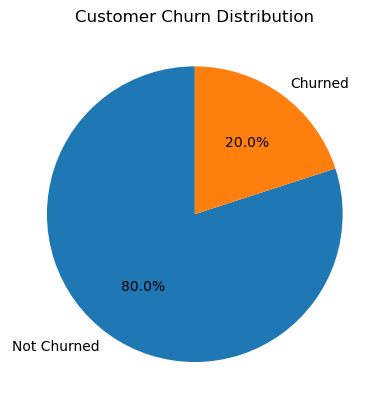

In [959]:
churn_counts = df["Churn"].value_counts()

plt.pie(
    churn_counts, labels=["Not Churned", "Churned"], autopct="%1.1f%%", startangle=90
)
plt.title("Customer Churn Distribution")
plt.show()

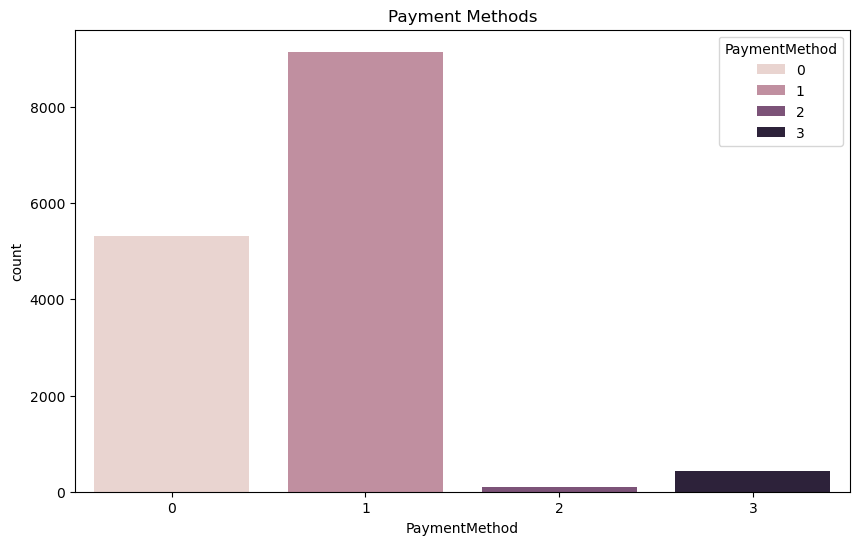

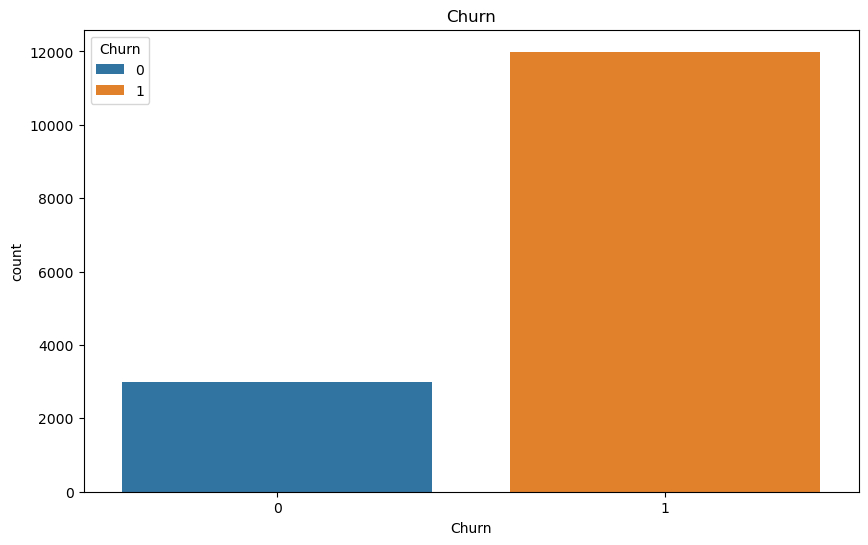

In [960]:
def create_countplot(data, x, hue, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=x, hue=hue)
    plt.title(title)
    plt.show()


create_countplot(df, "PaymentMethod", "PaymentMethod", "Payment Methods")
create_countplot(df, "Churn", "Churn", "Churn")

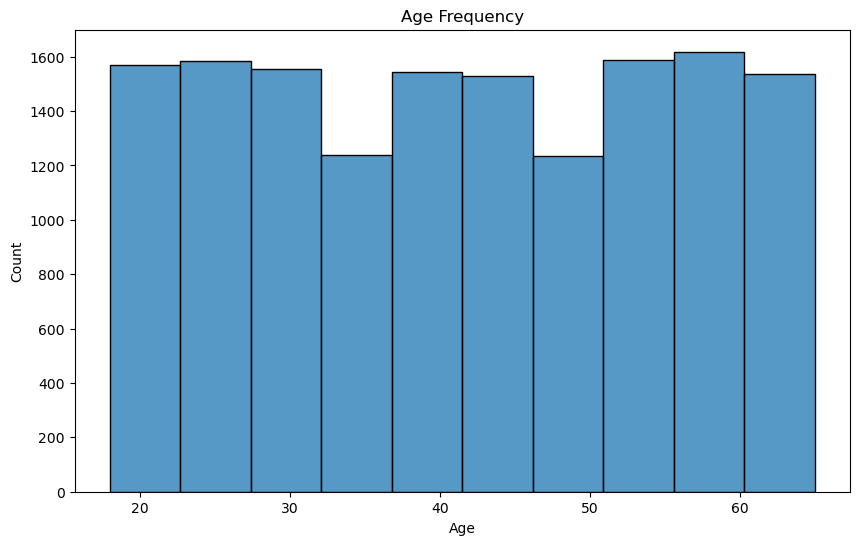

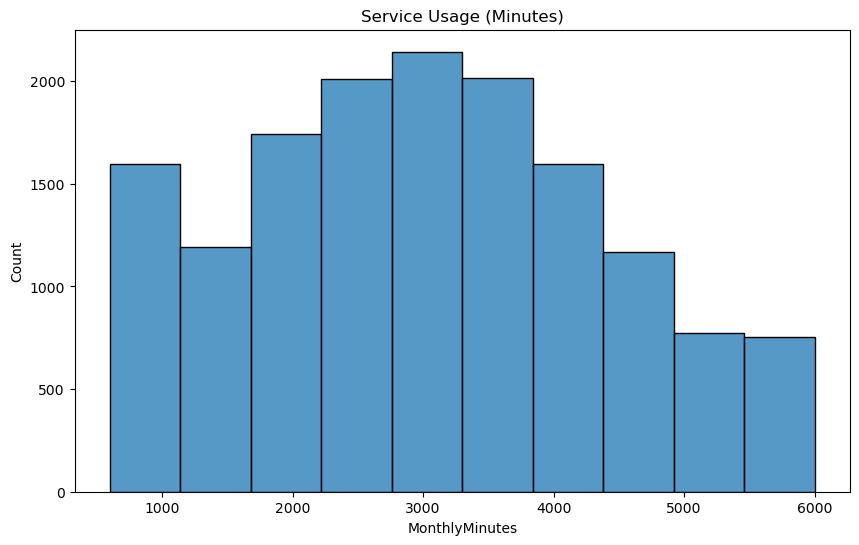

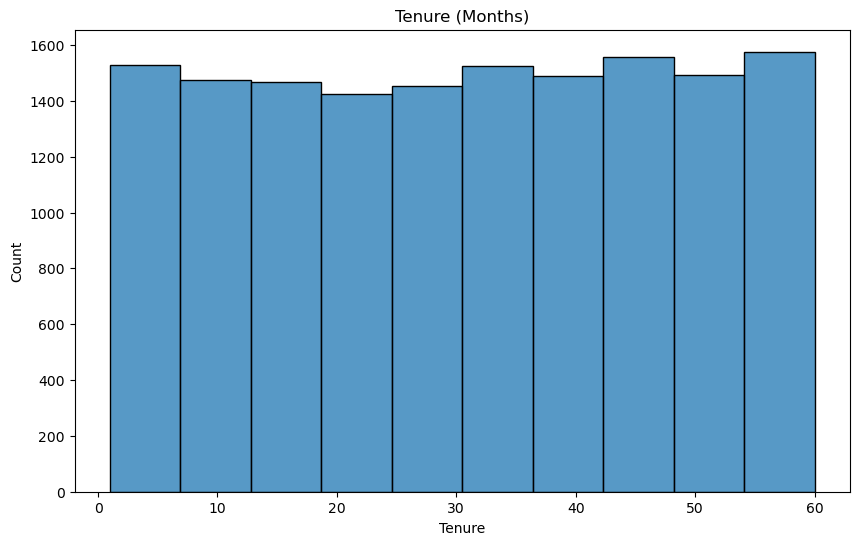

In [961]:
def create_histplot(data, x, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[x], bins=10)
    plt.title(title)
    plt.show()


create_histplot(df, "Age", "Age Frequency")
create_histplot(df, "MonthlyMinutes", "Service Usage (Minutes)")
create_histplot(df, "Tenure", "Tenure (Months)")

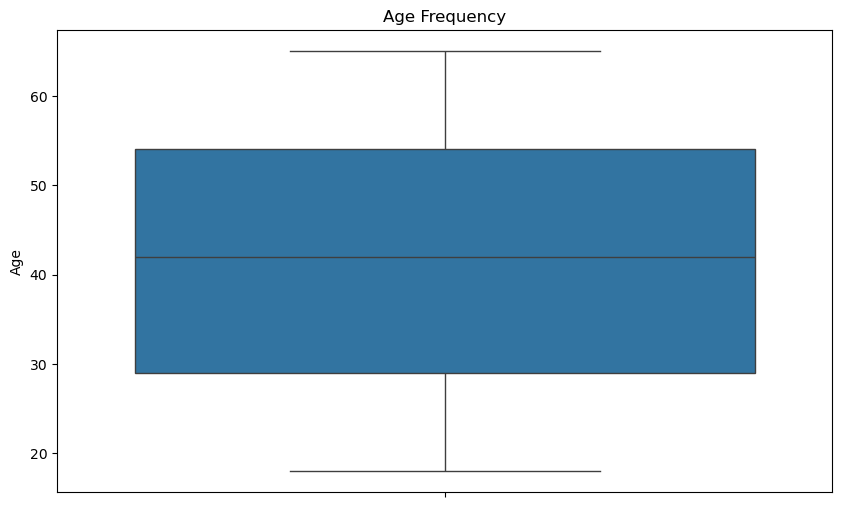

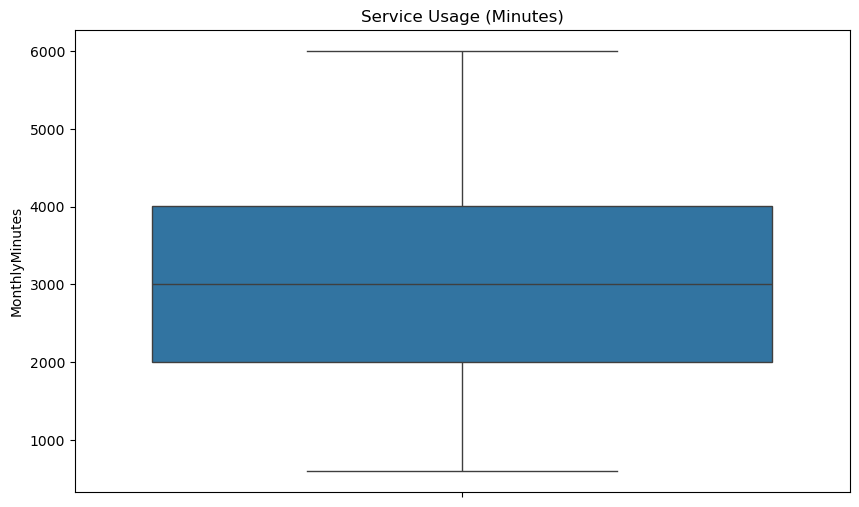

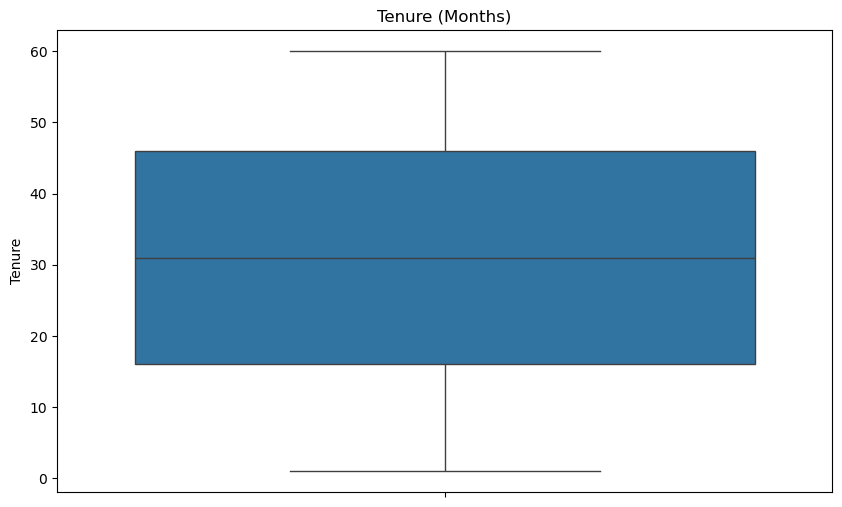

In [962]:
def create_boxplot(data, x, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data[x])
    plt.title(title)
    plt.show()


create_boxplot(df, "Age", "Age Frequency")
create_boxplot(df, "MonthlyMinutes", "Service Usage (Minutes)")
create_boxplot(df, "Tenure", "Tenure (Months)")

In [963]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Prepare your data
X = df.drop(["CustomerID", "Churn"], axis=1)
y = df["Churn"]

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RFE with RandomForestClassifier
rfe = RFE(rf, n_features_to_select=1)
fit = rfe.fit(X, y)

# Summarize the selection of features
selected_features = pd.DataFrame(
    {"Feature": X.columns, "Ranking": fit.ranking_}
).sort_values(by="Ranking")
print(selected_features)

          Feature  Ranking
1  MonthlyMinutes        1
3          Tenure        2
2             Age        3
0   PaymentMethod        4


In [964]:
df.columns
# Not important: CUSID, PAYM,
# Check for age, montlymins, tenure

Index(['CustomerID', 'PaymentMethod', 'MonthlyMinutes', 'Age', 'Tenure',
       'Churn'],
      dtype='object')

In [965]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=["Churn", "CustomerID", "PaymentMethod", "Age"])
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [966]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=9, metric="euclidean", p=1)
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.78942354 0.79228204 0.79085279 0.79122974 0.79122974]
Mean cross-validation score: 0.7910035692696736


In [967]:
X_train

array([[ 1.66010359, -1.41144038],
       [-0.9023382 ,  1.51410222],
       [-1.01153793,  0.82573925],
       ...,
       [-0.77045174,  1.51410222],
       [ 0.19352683, -1.0672589 ],
       [-1.73255852,  1.62882938]])

In [968]:
from sklearn.metrics import accuracy_score

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy_score(y_pred, y_test)

0.7843485993775011

C:\Users\Chris\AppData\Local\Temp\ipykernel_20176\4103447011.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


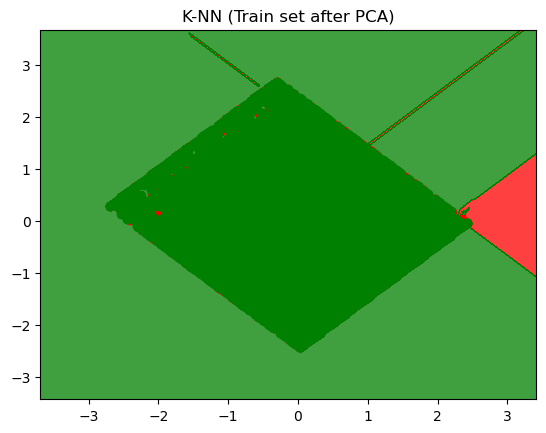

In [969]:
# Apply PCA to reduce to 2 dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)  # Reduce training set to 2D
X_test_pca = pca.transform(X_test)  # Reduce test set to 2D for consistency

# Fit the K-NN model on the PCA-transformed data (which has 2 features now)
knn = KNeighborsClassifier(n_neighbors=9)  # Try with k=5 for more balance
knn.fit(X_train_pca, y_train)

# Create the meshgrid based on the reduced features
X1, X2 = np.meshgrid(
    np.arange(
        start=X_train_pca[:, 0].min() - 1, stop=X_train_pca[:, 0].max() + 1, step=0.01
    ),
    np.arange(
        start=X_train_pca[:, 1].min() - 1, stop=X_train_pca[:, 1].max() + 1, step=0.01
    ),
)

# Plot the decision boundary and points
plt.contourf(
    X1,
    X2,
    knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the data points
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(
        X_train_pca[y_train == j, 0],
        X_train_pca[y_train == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )
plt.title("K-NN (Train set after PCA)")
plt.show()

In [970]:
y_pred = knn.predict(X_test)

# Convert y_test to a NumPy array
y_test_array = y_test.to_numpy()  # or use y_test.values

# Concatenate the predicted values and the true values
result = np.concatenate(
    (y_pred.reshape(len(y_pred), 1), y_test_array.reshape(len(y_test_array), 1)), axis=1
)

print(result)

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [971]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

print(f"Accuracy Score: {accuracy_score(y_pred, y_test):.3f}%")
print(f"Precision Score: {precision_score(y_pred, y_test):.3f}%")
print(f"Recall Score: {recall_score(y_pred, y_test):.3f}%")

Accuracy Score: 0.790%
Precision Score: 0.987%
Recall Score: 0.797%


<Axes: >

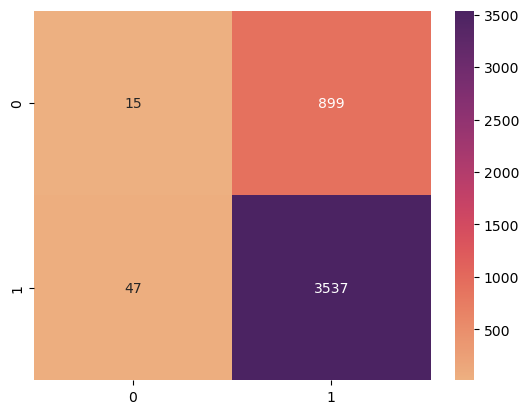

In [972]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap="flare", fmt=".0f")